<a href="https://colab.research.google.com/github/pnkj51/Cotton-Disease-Prediction/blob/main/CottonDisease_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Dense,Lambda,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob


In [6]:
import tensorflow as tf 
print(tf.__version__)
tf.test.gpu_device_name()

2.5.0


'/device:GPU:0'

In [4]:
!nvidia-smi

Fri Jul  9 11:09:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/val'

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [10]:
for layer in inception.layers:
  layer.trainable=False

In [11]:
folders = glob('/content/drive/MyDrive/data/train/*')

In [13]:
len(folders)

4

In [14]:
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=inception.input,outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [28]:
# model is trained for 20 epochs 10 + 10 two times

r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 36s 595ms/step - loss: 0.3025 - accuracy: 0.9580 - val_loss: 0.7304 - val_accuracy: 0.9228
Epoch 2/10
61/61 [==============================] - 36s 590ms/step - loss: 0.4415 - accuracy: 0.9549 - val_loss: 0.7257 - val_accuracy: 0.9136
Epoch 3/10
61/61 [==============================] - 36s 588ms/step - loss: 0.3264 - accuracy: 0.9610 - val_loss: 0.9968 - val_accuracy: 0.9136
Epoch 4/10
61/61 [==============================] - 36s 590ms/step - loss: 0.4200 - accuracy: 0.9518 - val_loss: 1.1553 - val_accuracy: 0.9043
Epoch 5/10
61/61 [==============================] - 36s 591ms/step - loss: 0.3536 - accuracy: 0.9600 - val_loss: 0.7549 - val_accuracy: 0.9383
Epoch 6/10
61/61 [==============================] - 36s 587ms/step - loss: 0.3083 - accuracy: 0.9651 - val_loss: 0.5539 - val_accuracy: 0.9352
Epoch 7/10
61/61 [==============================] - 37s 612ms/step - loss: 0.4732 - accuracy: 0.9482 - val_loss: 0.8811 - val_accuracy: 0.9228

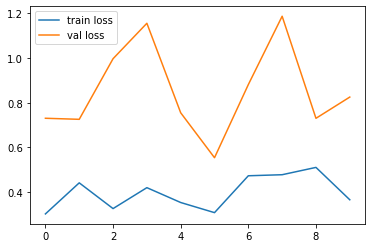

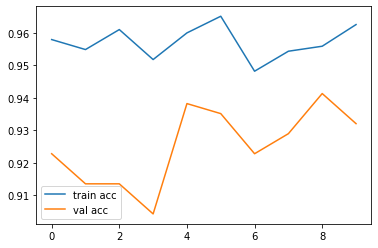

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('model_inception.h5')

In [31]:

y_pred = model.predict(valid_set)

In [32]:
y_pred

array([[1.0000000e+00, 1.3013740e-14, 0.0000000e+00, 5.3178282e-25],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1480174e-27],
       [3.5523360e-29, 9.2520139e-24, 1.0000000e+00, 5.7654057e-25],
       ...,
       [1.7769544e-24, 3.1373474e-18, 3.2365547e-33, 1.0000000e+00],
       [0.0000000e+00, 3.4331870e-32, 0.0000000e+00, 1.0000000e+00],
       [4.7807727e-22, 1.1745093e-15, 5.7764836e-31, 1.0000000e+00]],
      dtype=float32)

In [33]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 2, 2, 2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 3, 2, 3, 0, 1, 1, 1, 0, 1,
       2, 1, 1, 2, 3, 3, 1, 0, 3, 0, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 3, 3,
       0, 2, 1, 1, 2, 0, 2, 2, 3, 2, 2, 3, 1, 3, 2, 2, 0, 3, 1, 1, 3, 0,
       3, 1, 0, 1, 2, 3, 3, 1, 3, 1, 2, 3, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1,
       1, 1, 1, 3, 3, 0, 1, 0, 2, 1, 0, 3, 2, 3, 2, 3, 2, 2, 1, 0, 1, 2,
       0, 2, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 3, 2, 1, 1, 0, 3,
       0, 3, 1, 2, 3, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 3, 1, 3, 2, 1,
       3, 3, 0, 2, 1, 1, 2, 1, 3, 3, 3, 1, 0, 1, 1, 3, 2, 3, 1, 1, 3, 3,
       1, 0, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 3, 2, 3, 1, 2, 3, 1, 1, 1, 2, 1, 0, 2, 2, 3, 1, 2, 3, 3,
       3, 1, 0, 0, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 2, 1, 0, 3, 2, 0, 1, 0,
       3, 1, 2, 0, 2, 3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 0, 1, 2, 3, 2, 1, 1,
       2, 3, 0, 0, 3, 0, 3, 1, 1, 2, 3, 0, 3, 0, 2,

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_inception.h5')

In [40]:
img=image.load_img('/content/drive/MyDrive/data/test/diseased cotton plant/dd (328).jpg',target_size=(224,224))

In [41]:
x=image.img_to_array(img)
x

array([[[ 86.,  77.,  60.],
        [115., 100.,  79.],
        [112.,  97.,  76.],
        ...,
        [ 58., 105.,  53.],
        [ 61., 108.,  56.],
        [ 60., 107.,  55.]],

       [[103.,  90.,  74.],
        [164., 152., 128.],
        [ 89.,  73.,  57.],
        ...,
        [ 44.,  91.,  39.],
        [ 49.,  96.,  44.],
        [ 52.,  96.,  47.]],

       [[136., 120.,  94.],
        [105.,  91.,  65.],
        [133., 117.,  91.],
        ...,
        [ 51.,  98.,  46.],
        [ 50.,  97.,  45.],
        [ 53.,  97.,  48.]],

       ...,

       [[138., 122.,  96.],
        [ 99.,  83.,  60.],
        [109.,  93.,  70.],
        ...,
        [ 70.,  62.,  49.],
        [ 59.,  51.,  38.],
        [ 61.,  53.,  40.]],

       [[100.,  85.,  64.],
        [117., 101.,  75.],
        [146., 129.,  99.],
        ...,
        [ 84.,  77.,  61.],
        [ 66.,  59.,  43.],
        [ 73.,  66.,  50.]],

       [[143., 126.,  98.],
        [ 84.,  68.,  45.],
        [149., 1

In [42]:
x.shape

(224, 224, 3)

In [43]:
x=x/255

In [44]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [45]:
model.predict(x)

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 3.61858e-33]],
      dtype=float32)

In [47]:
np.argmax(model.predict(x), axis=1)

array([1])